In [19]:
import numpy as np
import sklearn
import pandas as pd
from PIL import Image
import os
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import cv2

In [2]:
gt, mt, nt, pt = [], [], [], []

def im_to_arr(dfl:list, path:str):
    filenames = os.listdir(path=path)
    filen = len(filenames)
    for i in range(filen):
        img = Image.open(path+'/'+filenames[i]).convert('L')
        dfl.append(np.asarray(img))

In [3]:
im_to_arr(gt, "tumor_dataset/Training/glioma_tumor")
im_to_arr(nt, "tumor_dataset/Training/no_tumor")
im_to_arr(mt, "tumor_dataset/Training/meningioma_tumor")
im_to_arr(pt, "tumor_dataset/Training/pituitary_tumor")

In [4]:
def imageshow(arr:np.ndarray):
    plt.figure(figsize=(5, 5))
    plt.imshow(arr, cmap='gray')
    plt.axis('off')
    plt.show()

In [9]:
def shape_check(l):
    tl = []
    for arr in l:
        tl.append(arr.shape)
    x = pd.Series(tl)
    print(len(x))
    print(x.value_counts()[(512,512)])

In [10]:
shape_check(gt)
shape_check(mt)
shape_check(pt)
shape_check(nt)

826
826
822
679
827
799
395
5


이미지 비율이 512x512가 아닌 애들끼리 학습(512*512 & no_tumor인건 제거)   
이미지 비율이 512x512인 애들은 사진 찍은 각도에 대해 분류 후 지들끼리 하거나 레이블 추가

In [28]:
def delete_bg(imgarr:np.ndarray):
    margin = [[0,0],[0,0]]
    for i in range(2):
        max_col = imgarr.max(axis=i)
        margin[i][0] = np.argmax(max_col != 0); margin[i][1] = 512 - np.argmax(np.flip(max_col) != 0)
    print(margin)

delete_bg(gt[777])

[[56, 456], [16, 508]]


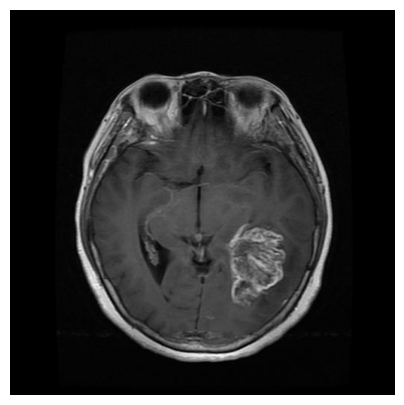

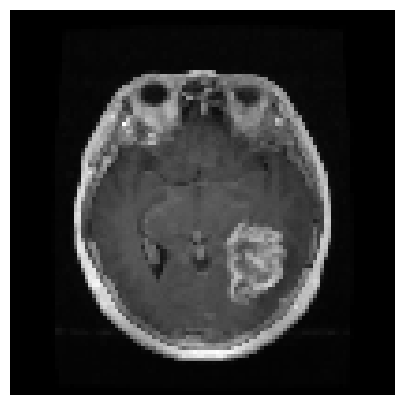

(103, 103)


In [18]:
imageshow(gt[777])
pooled = block_reduce(gt[777], (5, 5), np.max)
imageshow(pooled)
print(pooled.shape)